# Imbalanced Dataset Handling
1. Upsampling
2. Down Sampling

In [2]:
import numpy as np
import pandas as pd

In [36]:
## CREATION OF DATASET:

In [3]:
np.random.seed(120)

In [4]:
n_samples = 1000
class_0_ratio = 0.9

no_class_0_samples = int(n_samples * class_0_ratio)   # 900 samples of class -> 0
no_class_1_samples = int(n_samples - no_class_0_samples) # 100 samples of class -> 1


In [5]:
no_class_0_samples , no_class_1_samples

(900, 100)

In [20]:
class_0 = pd.DataFrame({
    "feature_1": np.random.normal(loc=0.0, scale=1.0, size=no_class_0_samples), # Draw random samples from a normal (Gaussian) distribution.
    "feature_2": np.random.normal(loc=0.0, scale=1.0, size=no_class_0_samples),
    "target":[0]*no_class_0_samples
})

class_1= pd.DataFrame({
    "feature_1": np.random.normal(loc=0.0, scale=1.0, size=no_class_1_samples),# Draw random samples from a normal (Gaussian) distribution.
    "feature_2": np.random.normal(loc=0.0, scale=1.0, size=no_class_1_samples),  
    "target":[1]*no_class_1_samples
})

In [21]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [22]:
df.head()

,feature_1,feature_2,target
0,0.697480,0.488784,0
1,0.367643,1.252162,0
2,-0.891591,-0.906159,0
3,-0.771918,-0.476869,0
4,-0.572669,-0.800108,0


In [23]:
df["target"].value_counts()


0    900
1    100
Name: target, dtype: int64

# UPSAMPLING:

In [25]:
df_minority = df[df['target']==1]    # minority features having target val ==1
df_majority = df[df['target']==0]    # majority features having target val ==0

In [26]:
df_minority.head()

,feature_1,feature_2,target
900,0.135006,0.185756,1
901,-0.060727,0.365492,1
902,0.105359,1.972943,1
903,-0.477503,-0.402066,1
904,-0.587949,1.148192,1


In [27]:
df_majority.head()

,feature_1,feature_2,target
0,0.697480,0.488784,0
1,0.367643,1.252162,0
2,-0.891591,-0.906159,0
3,-0.771918,-0.476869,0
4,-0.572669,-0.800108,0


In [28]:
df_majority.tail()

,feature_1,feature_2,target
895,-0.010414,-0.669185,0
896,-0.887937,-1.170086,0
897,0.921821,0.671783,0
898,-0.898931,-1.372305,0
899,-0.869760,-0.926567,0


In [43]:
##Upsampling perform
from sklearn.utils import resample

In [44]:
df_minority_upsample = resample(df_minority,
                               replace=True,  # Implements resampling with replacement. If False, this will implement random permutations
                               n_samples=len(df_majority), # to match the majority class , i.e of zeros (to increase the 1's from 100 to 900)
                               random_state=42)

In [45]:
df_minority_upsample.shape

(900, 3)

In [46]:
df_minority_upsample["target"].value_counts()

1    900
Name: target, dtype: int64

In [47]:
upsampled_df = pd.concat([df_majority,df_minority_upsample]) #CONCATINATING THE MAJORITY AND UPSAMPLED DF FOR CHECKING OUT THE VALUES

In [48]:
upsampled_df["target"].value_counts()

0    900
1    900
Name: target, dtype: int64

In [49]:
upsampled_df.shape   # 1'S VALUE ARE UPSAMPLED TO MATCH 0'S VALUE

(1800, 3)

# DOWNSAMPLING:

In [50]:
# REDUCING THE ZEROS TO MATCH THE ONES:

In [51]:
df_majority_downsample = resample(df_majority,
                                 replace = True,
                                 n_samples = len(df_minority),
                                 random_state=50)


In [52]:
df_majority_downsample.shape

(100, 3)

In [53]:
df_majority_downsample["target"].value_counts()

0    100
Name: target, dtype: int64

In [56]:
downsampled_df = pd.concat([df_majority_downsample,df_minority]) #CONCATINATING THE MINORITY AND DOWNSAMPLED_DF FOR CHECKING OUT THE VALUES

In [57]:
downsampled_df["target"].value_counts()

0    100
1    100
Name: target, dtype: int64

In [58]:
downsampled_df.shape  # 0'S VALUE ARE DOWNSAMPLED TO MATCH 1'S VALUE

(200, 3)

# SMOTE:

In [1]:
## SMOTE(Synthetic Minority Oversampling Technique)
'''
SMOTE (Synthetic Minority Over(up)-sampling Technique) is a technique used in machine learning to address imbalanced 
datasets where the minority class has significantly fewer instances than the majority class. 
SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.
'''

'\nSMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced \ndatasets where the minority class has significantly fewer instances than the majority class. \nSMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.\n'

In [60]:
from sklearn.datasets import make_classification  # for classifying features

In [61]:
## X - independent feature(input feature)
## y - dependent fearure(output feature)

# make_classification - Generate a random n-class classification problem.

X,y = make_classification(n_samples=1000 , n_features=2 ,n_redundant = 0 ,n_clusters_per_class=1 , weights=[0.90],random_state=1)

"""
weights = The proportions of samples assigned to each class. If None, then classes are balanced.
          weights = [0.9] means classes are not balanced. It is in the ratio 9:1

n_features = represents the number of features to be derived

n_redundant = The number of redundant features. These features are generated as random linear combinations of the informative features.
"""

'\nweights = The proportions of samples assigned to each class. If None, then classes are balanced.\n          weights = [0.9] means classes are not balanced. It is in the ratio 9:1\n          \nn_redundant = The number of redundant features. These features are generated as random linear combinations of the informative features.\n'

In [62]:
X,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [69]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)  # axis=1 , represents concatinating df column wise:

In [70]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [71]:
final_df["target"].value_counts()

0    894
1    106
Name: target, dtype: int64

In [72]:
import matplotlib.pyplot as plt


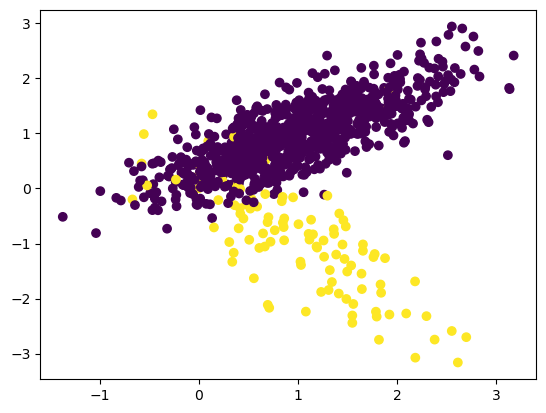

In [75]:
plt.scatter(final_df['f1'],final_df['f2'], c=final_df['target'])

In [10]:
# unbalanced dataset, no equal number of 1's and 0's

In [11]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.0 MB/s eta 0:00:00


In [12]:
from imblearn.over_sampling import SMOTE   # from imbalancedlearn importing smote:

In [13]:
# USING SMOTE TECHNIQUE FOR OVERSAMPLING:
oversample = SMOTE()

In [14]:
X,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])
# pass the data-points(features) and the target variable(output)

In [15]:
len(y[y == 0])

894

In [16]:
len(y[y == 1])

894

In [17]:
df1 = pd.DataFrame(X,columns=["f1","f2"])
df2 = pd.DataFrame(y,columns=["target"])

oversample_df = pd.concat([df1,df2],axis=1)

In [18]:
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.563354,-1.539737,1
1784,1.606518,-1.085745,1
1785,0.969152,-0.202405,1
1786,1.262725,-1.238810,1


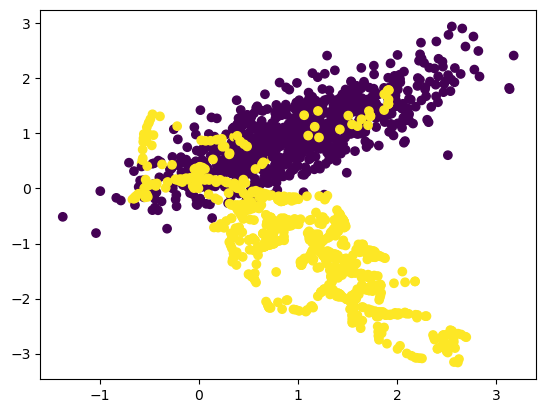

In [19]:
plt.scatter(oversample_df["f1"],oversample_df["f2"],c = oversample_df["target"])

In [20]:
# equal 1's and 0's in the above dataset

# DATA INTERPOLATION